<AxesSubplot: title={'center': 'Compare stock in January'}, xlabel='Date'>

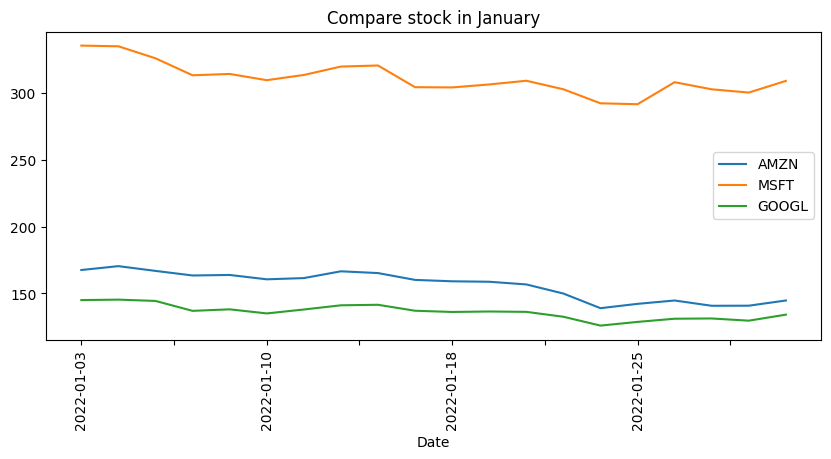

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

all_files = glob.glob('./data1/*.csv')
data = list(map(pd.read_csv, all_files))
data_file_dict = {'AMZN': data[0], 'GOOGL': data[1], 'MSFT': data[2] }
start_date = '2022-01-01'
end_date = '2022-01-31'

#new_data1 = data[['Date', 'Open', 'Close']]

def get_date_between(df, start_date, end_date):
    return df.loc[df['Date'].between(start_date, end_date)]

google = get_date_between(data_file_dict['GOOGL'], start_date, end_date)
amazon = get_date_between(data_file_dict['AMZN'], start_date, end_date)
microsoft = get_date_between(data_file_dict['MSFT'], start_date, end_date)

# legend_info should be a list [ 'STOCK_TICKER_SYMBOL' ]
# example: legend_info = [ 'CSCO' ]
def plot_data_january(df, legend_info, ax=None):
    if ax:
        plot = df.plot(
            kind = 'line', 
            x='Date', 
            y = ['Open'], 
            figsize=(10,4), 
            title='Compare stock in January 2022', 
            rot=90,
            legend=True,
            ax=ax
        )
    else:
        plot = df.plot(
            kind = 'line', 
            x='Date', 
            y = ['Open'], 
            figsize=(10,4), 
            title='Compare stock in January', 
            rot=90,
            legend=True
        )

    plt.legend(legend_info)
    return plot

google_ax_plot = plot_data_january(google, ['GOOGL'])
amazon_and_google_ax_plot= plot_data_january(amazon, ['AMZN'], ax=google_ax_plot)
plot_data_january(microsoft, ['AMZN', 'MSFT', 'GOOGL'], ax=amazon_and_google_ax_plot)
